# Stationarity & ADF test

- Author: Ayush Patel
- Github: https://github.com/Ayush-Patel15 
- LinkedIn: https://www.linkedin.com/in/ayush-15-patel/

<hr>

Most statistical forecasting methods are based on the assumption that time series is stationary. But most business and economic time series are far from stationary, but we make it approximately stationary through the use of some mathematical transformations which are relatively easier to predict.

`NOTE:` We have two types of stationarity, Strong and Weak Stationarity. For more details around them, you can google and read about them. Because, it's a whole topic in itself and this notebook is not about them. We will be talking about the weak stationarity, and I will pronounce it as stationarity. Therefore, wherever I am discussing about stationarity, it will always about weak stationarity. In most of financial time series concepts, we are concerned about weak stationarity only, as it is hard to achieve Strong Stationarity.

<hr>

### What is Stationarity?

A stationary time series is one whose statistical properties such as mean, variance, autocovariance, etc. do not change over time. In simpler terms, they doesn't change with respect to time, i.e they are not a function of time. Example: A white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time. <br>

Let's dig deeper into the statements:

- The mean of the series should not be a function of time. The red graph below is not stationary because the mean increases over time.<br><br>
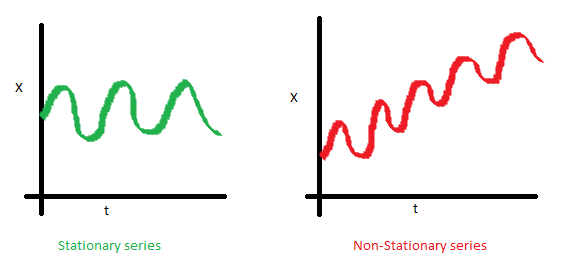<br>

- The variance of the series should not be a function of time. This property is known as homoscedasticity (Variance doesn't change over time). Similarly, Heteroscedasticity is when the variance changes w.r.t time. Notice in the red graph the varying spread of data over time.<br><br>
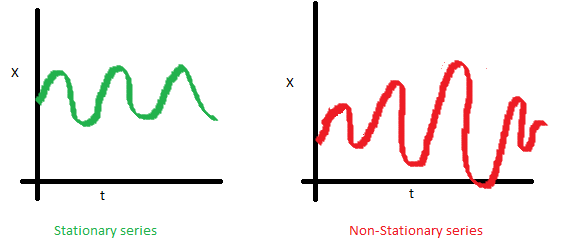<br>

- The covariance of the i-th term and the (i + m)-th term should not be a function of time. In the following graph, you will notice the spread becomes closer as the time increases. Hence, the covariance is not constant with time for the red series. <br><br>
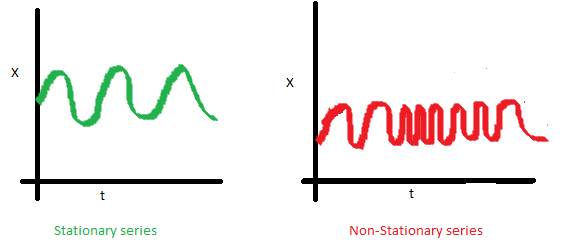

<hr>

### Importance of Stationarity

- Validity of Statistical Models: Many statistical models (e.g. ARMA, ARIMA, SARIMA) and machine learning methods assume stationarity. Non-stationary data can lead to biased estimates and invalid predictions, as these models rely on the consistency of mean and variance over time.

- Simplifies Analysis: Stationary data is easier to analyze and interpret because it eliminates the complexity introduced by trends and seasonality.

- Reliable Forecasting: Stationary data ensures that the relationships between variables remain stable over time. Forecasting models built on stationary data are more likely to produce consistent and reliable predictions.

- Helps in Hypothesis Testing: Hypothesis tests like the Augmented Dickey-Fuller (ADF) test or KPSS test are specifically designed for stationary data. These tests help determine the presence of unit roots, trends, or seasonality, enabling accurate model selection.

Therefore, Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. 

`Example:` When running a linear regression the assumption is that all of the observations are all independent of each other. In a time series, however, we know that observations are time dependent. It turns out that a lot of nice results that hold for independent random variables, hold for stationary random variables. So by making the data stationary, we can actually apply regression techniques to this time dependent variable.

<hr>

### Ways to check for Stationarity of time-series

- By visual plotting of data, and other statistical plotting like the ACF, and PACF plot.
- By checking the mean, variance, and covariance of the time-series for global and local intervals.
- By statistical tests, like the ADF test.

<hr>

### Using Visual Plotting

We can plot the time-series, and can check for some trends or directional movements or seasonality in the plot visually. For more statistical valid plots, we can plot the ACF and PACF plots, they are also known as correlograms. Let's understand about ACF and PACF plot.

`Auto Correlation Function (ACF)`: It measures the correlation between a time-series and its lagged values at various time lags.
It captures both direct relationships (e.g. a value at 𝑡 with 𝑡−1) and indirect relationships (e.g. 𝑡 with 𝑡−2 via 𝑡−1).

`Partial Autocorrelation Function (PACF)`: It measures the correlation between a time-series and its lagged values, removing the influence of intermediate lags. It isolates the direct relationship of a specific lag (e.g. t with t-2 direct).

- Example of ACF and PACF plots of a non-stationary time series, with some trends and seasonality.

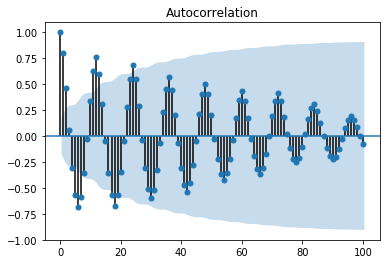 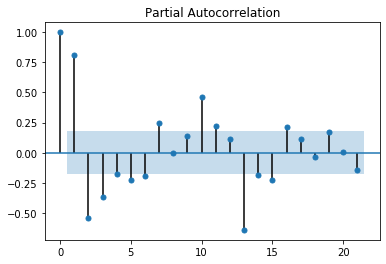 <br>

- Example of ACF and PACF plots of a stationary time series, with no trends and no seasonality.

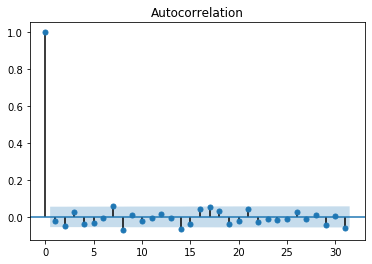 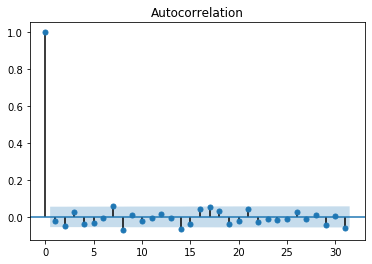<br>

- For Non-Stationary Time-Series, the ACF plot slowly decays as lag increases and indicates the presence of trends or persistence in the data.
Whereas, the PACF plot shows significant correlation at multiple lags with no sharp cutoff.

- For Stationary Time-Series, the ACF plot drops to zero relatively quickly, indicating short-term dependencies. And the PACF plot has a sharp cutoff after the first lag, signifying that lags have no significant influence.

<hr>

### Using Global and Local intervals

It is as simple as it seems, calculate a global mean and global variance of the complete time series. Then, calculate the mean and variance for different local intervals. The Global and Local variables should be almost same, or near about to be equal. Then onl, we can say that the mean and variance are not a function of time, and is not varying with various time intervals.

<hr>

### Using strong statistical test

This is the best and most prominent method to use. We can use strong statistical test like ADF Test, Johansen Test, and etc to test for the stationarity of the time-series. In this notebook, I will demonstrate to use the ADF test to check for stationarity, as it is widely used and considered good.

<hr>

### Now, let's combine everything and use Python to understand

I will create two series, a stationary and a non-stationary price series. Then, I will check for stationarity by visual plots and confirm the results using the ADF test.

In [31]:
## Import Statements
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

I simply created a sample stationary series using the random module's normal function with mean=0, std=1. As we know, the integrated root for a stationary series is 0 i.e I(0). Therefore, to create a non-stationary series with unit root, I(1): I can just create a cumsum of the stationary series. It will result in a non-stationary series. Let's prove this also.

In [32]:
## Create two random series: a stationary and a non-stationary series
np.random.seed(50)
series_x = np.random.normal(0, 1, 500)
series_y = np.cumsum(series_x)

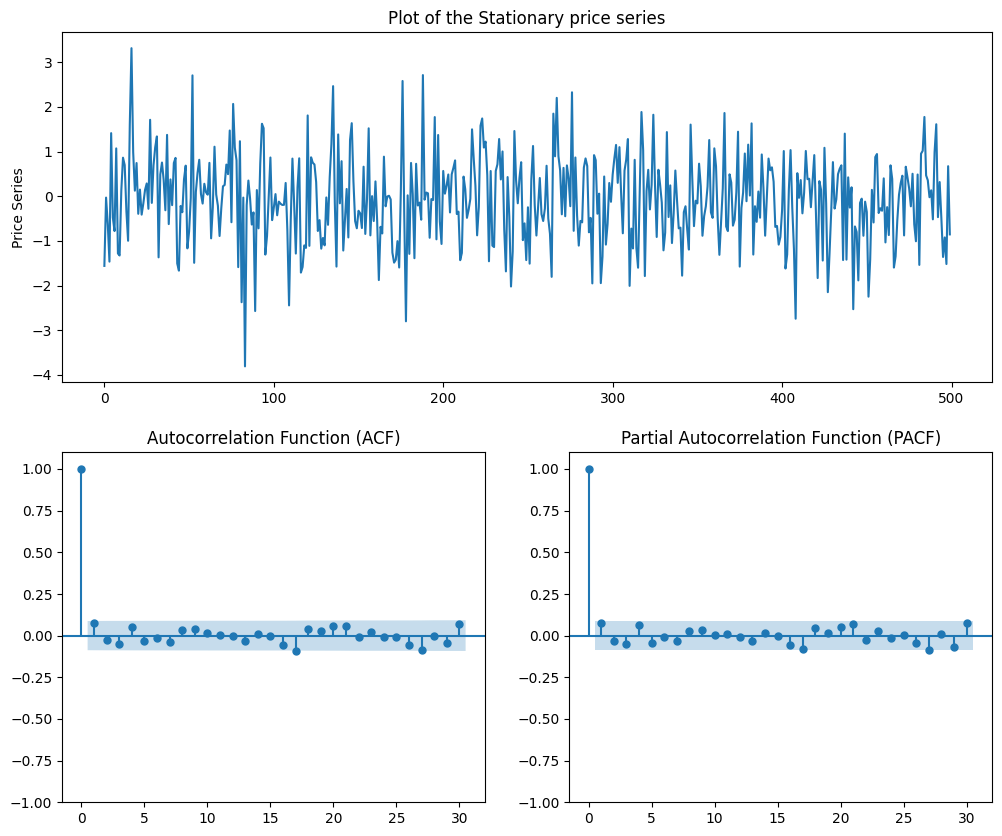

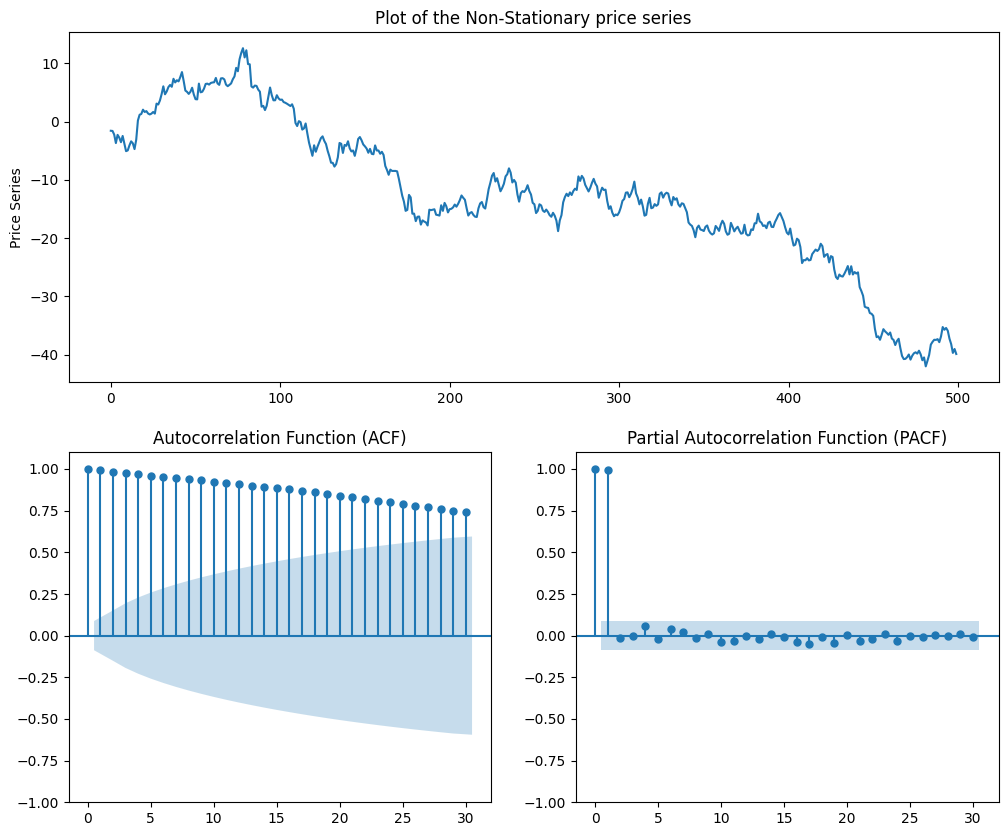

In [33]:
## Let's analyze both the series, using the visual plots of series, the ACF and PACF plots
def visualize_the_series(price_series, title_text):
	fig = plt.figure(figsize=(12,10))
	layout = (2, 2)
	ps_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
	acf_ax = plt.subplot2grid(layout, (1, 0))
	pacf_ax = plt.subplot2grid(layout, (1, 1))
	## Plot all the required plots at their axis
	ps_ax.plot(price_series, linewidth=1.5)
	ps_ax.set_title(f"Plot of the {title_text} price series")
	ps_ax.set_ylabel("Price Series")
	plot_acf(price_series, ax=acf_ax, lags=30, title="Autocorrelation Function (ACF)")
	acf_ax.set_ylim([-1.0, 1.1])	
	plot_pacf(price_series, ax=pacf_ax, lags=30, title="Partial Autocorrelation Function (PACF)")
	pacf_ax.set_ylim([-1.0, 1.1])	
	plt.show();

visualize_the_series(series_x, "Stationary")
visualize_the_series(series_y, "Non-Stationary")

By visual inspections, we can easily differentiate between a stationary and a non-stationary series.

### The ADF test: To confirm the stationarity

The ADF test returns the following information: (adf_test_statistic, MacKinnon’s approximate p-value, The number of lags used, number of observations used for the ADF regression, Critical values for the test statistic at the 1 %, 5 %, and 10 % levels, maximized information criterion if autolag is not None). We will be more concerned about the p-value, it should be below 0.05.

In [34]:
## Run the ADF test for series_x, and series_y
adf_x = adfuller(series_x)
adf_y = adfuller(series_y)

print("The critical values are:", adf_x[4])
print("The ADF statistic and the p-value for series_x is:", adf_x[0], adf_x[1])
print("The ADF statistic and the p-value for series_y is:", adf_y[0], adf_y[1])

The critical values are: {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}
The ADF statistic and the p-value for series_x is: -20.638652538920923 0.0
The ADF statistic and the p-value for series_y is: 0.10224520509101778 0.9662140507497494


For a series to be a stationary series: The p-value of the ADF test should be lesser than 0.05 

By looking at the p-value, we can easily conclude that the `series_x` is stationary in nature, and `series_y` is non-stationary.

<hr>

### Stationarity Check on Nifty50 Stocks

As usual, now let's try our understanding of Stationarity and ADF test on the Nifty50 stocks. For the ease of demonstration, I will only use the ADF test to determine stationarity, and not the visual graphs (because it's hard to plot the graphs for all stocks, if interested you can do so). The key assumptions are:

- Will test the stationarity for two different timeframes
	- For previous 1 year i.e. from 2024-01-01 to 2024-12-27
	- For previous 3 years i.e. from 2021-01-01 to 2024-12-27
- Collect or note the ADF test statistic, the p-value, and then compare it with 0.05, to state it is stationary or not.
- List of instruments: ['NIFTY','ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO']

In [35]:
## Import Statements
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import os

## Folderpath and list of instruments
DATA_FOLDERPATH = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices"
instruments_list = os.listdir(DATA_FOLDERPATH)
result_dict = {"Instrument_name":[], "Test_statistic_1_yr":[], "P_value_1_yr":[], "Test_statistic_3_yr":[], 
	"P_value_3_yr":[], "Verdict_1yr":[], "Verdict_3yr":[]}

## Function to test for the ADF Statistic
def process_adf_test(inst_csv):
	inst_filepath = os.path.join(DATA_FOLDERPATH, inst_csv)
	inst_df = pd.read_csv(inst_filepath, usecols=["Date","Close"]).set_index("Date")
	inst_df_1yr = inst_df.loc["2024-01-01":"2024-12-27"]
	inst_df_3yr = inst_df.loc["2021-01-01":"2024-12-27"]
	price_series_1yr = np.array(inst_df_1yr["Close"])
	price_series_3yr = np.array(inst_df_3yr["Close"])
	adf_1yr = adfuller(price_series_1yr)
	adf_3yr = adfuller(price_series_3yr)
	## Take out the critical value at 5%, and compare for verdict of stationarity
	verdict_1yr, verdict_3yr = "Non-Stationary", "Non-Stationary"
	if (adf_1yr[1] < 0.05):
		verdict_1yr = "Stationary"
	if (adf_3yr[1] < 0.05):
		verdict_3yr = "Stationary"
	## Store the values in the dictionary
	result_dict["Instrument_name"].append(inst_csv.split(".csv")[0])
	result_dict["Test_statistic_1_yr"].append(adf_1yr[0])
	result_dict["P_value_1_yr"].append(adf_1yr[1])
	result_dict["Test_statistic_3_yr"].append(adf_3yr[0])
	result_dict["P_value_3_yr"].append(adf_3yr[1])
	result_dict["Verdict_1yr"].append(verdict_1yr)
	result_dict["Verdict_3yr"].append(verdict_3yr)


## Process it iteratively to each instrument
for inst_csv in instruments_list:
	process_adf_test(inst_csv)

## Create a dataframe
adf_df = pd.DataFrame(result_dict)

In [36]:
## Save the df
adf_df.to_csv("Stationarity_and_ADF_test.csv")
adf_df

,Instrument_name,Test_statistic_1_yr,P_value_1_yr,Test_statistic_3_yr,P_value_3_yr,Verdict_1yr,Verdict_3yr
0,ADANIENT,-1.314489,0.622518,-2.351430,0.155917,Non-Stationary,Non-Stationary
1,ADANIPORTS,-2.368889,0.150710,-1.340919,0.610250,Non-Stationary,Non-Stationary
2,APOLLOHOSP,-1.595250,0.485979,-1.218260,0.665692,Non-Stationary,Non-Stationary
3,ASIANPAINT,-0.851691,0.803465,-2.205178,0.204371,Non-Stationary,Non-Stationary
4,AXISBANK,-2.078551,0.253226,-1.393947,0.585175,Non-Stationary,Non-Stationary
5,BAJAJ-AUTO,-2.110450,0.240333,-0.463355,0.898971,Non-Stationary,Non-Stationary
6,BAJAJFINSV,-1.658739,0.452487,-2.711933,0.071996,Non-Stationary,Non-Stationary
7,BAJFINANCE,-2.785610,0.060359,-2.866325,0.049406,Non-Stationary,Stationary
8,BANKNIFTY,-1.543419,0.511934,-1.281432,0.637624,Non-Stationary,Non-Stationary
9,BEL,-1.596104,0.485550,0.232686,0.974036,Non-Stationary,Non-Stationary


`CONCLUSION`: From the above df, we can easily conclude that most of the instruments are non-staionary in nature. However, KOTAKBANK results are stationary for 1 year, as well as for 3 years. Why so, look at the chart of KOTAKBANK, it has been trading in a range for the last 3 years. Attaching a plot, below for the confimation.

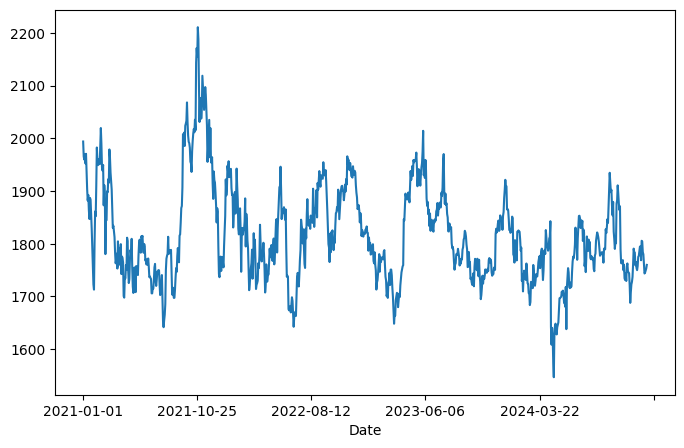

In [37]:
kotak_filepath = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\KOTAKBANK.csv"
kotak_df = pd.read_csv(kotak_filepath, usecols=["Date", "Close"]).set_index("Date")
kotak_df = kotak_df.loc["2021":]
kotak_df["Close"].plot(figsize=(8,5))
plt.show();

<hr>

### Limitations of ADF Test

- A low p-value may reject the null hypothesis of a unit root but does not account for other forms of non-stationarity (e.g., heteroscedasticity).
- The ADF test cannot handle non-linear dependencies or non-linear trends effectively.
- Poor lag selection may lead to incorrect results (overfitting or underfitting).
- The test results vary with changes in parameters like trend inclusion or lag length.

However, it's a pretty efficient test in terms of accuracy and reliability.

<hr>

References or Sources:

- https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
- https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Time%20Series%20Data.ipynb

<hr>

`DISCLAIMER`: This is just for the purpose of knowledge and my own learning, and not any advice to create any kind of portfolio based on the expected returns values. Do you own analysis and invest in markets. However, this is just for my own learning purpose, so need not to worry. For learning purpose, I can test for any weird possibilities, even if doesn't make any sense in the practical world.